In [1]:
import tensorflow as tf
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.10.0'

In [3]:
pd.__version__

'2.1.4'

In [4]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

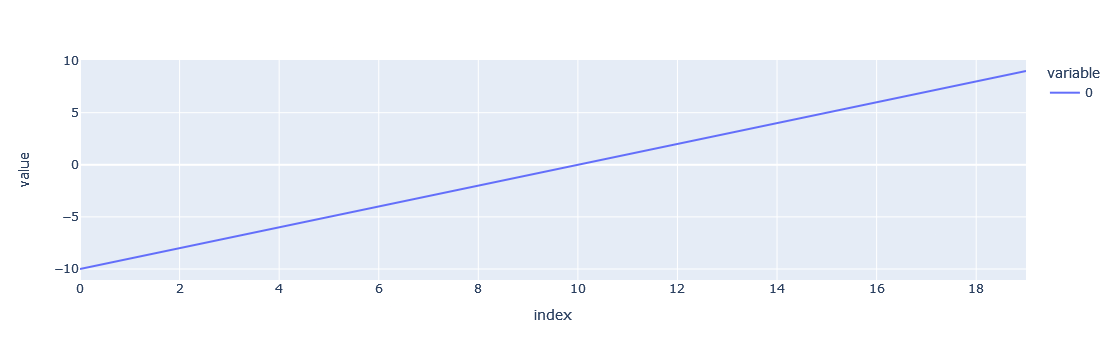

In [5]:
px.line(A)

In [6]:
#Lets start by replicating sigmoid = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

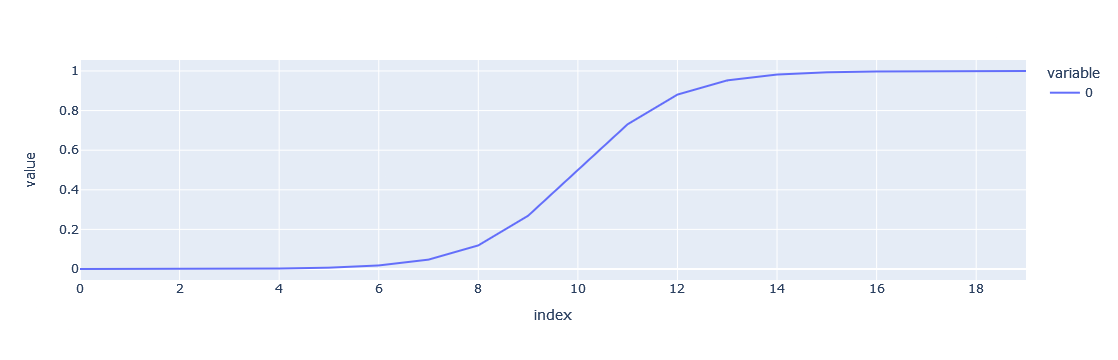

In [7]:
#Use sigmoid to our toy tensor
px.line(sigmoid(A))

In [8]:
def relu(x):
    return tf.maximum(0, x)

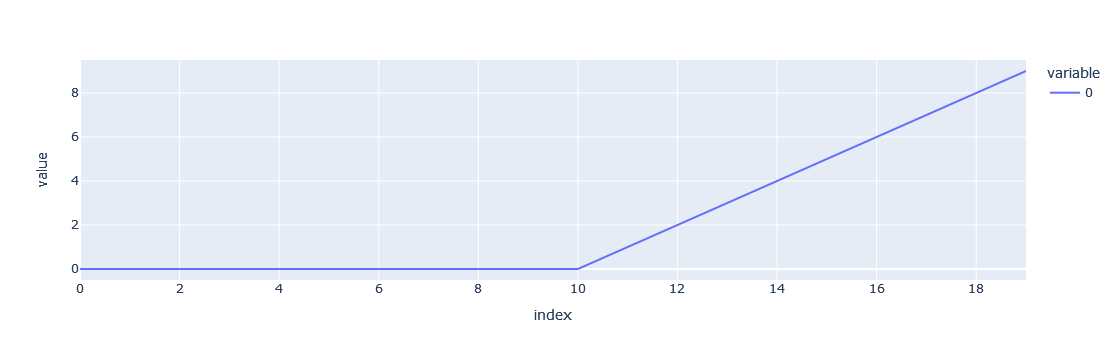

In [9]:
px.line(relu(A))

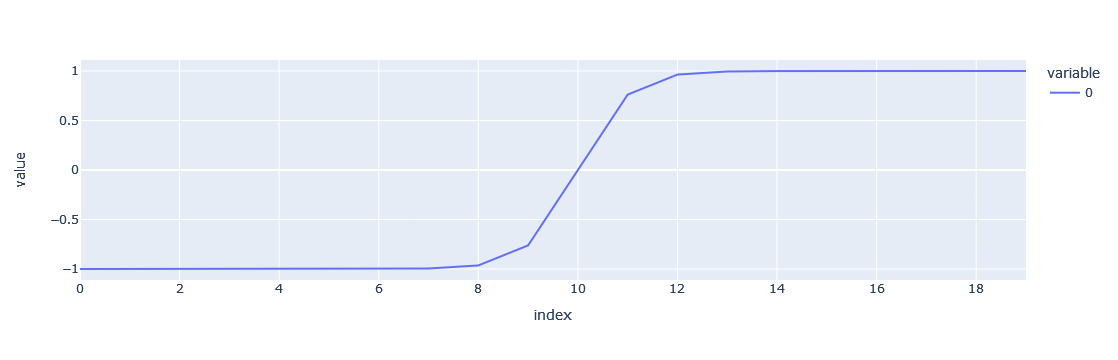

In [10]:
px.line(tf.keras.activations.tanh(A))

In [11]:
#Evaluate our classification model
from sklearn.datasets import make_circles
#make 1000 examples
n_samples = 1000

#Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
circles = pd.DataFrame({"X0":x[:,0], "X1":x[:,1], "label":y})
circles

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

In [12]:
def plot_decision_boundary(model, x, y):
    """
    
    Plots the decision boundary created by a model predicting on X.
    1. This function was inspired by cs23in
    2. github 09_multilayer_perceptrons.ipynb
    """
    #Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
    y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
    #Create x values on these predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]

    #Make predictions
    y_pred = model.predict(x_in)

    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("We are doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    #Plot the decision
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])  # Metrics adjusted for regression

hist_1 = model_1.fit(x_train, y_train, epochs=25, verbose=0)

In [15]:
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1058 - accuracy: 0.9850


[0.10581398755311966, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
We are doing binary classification
313/313 [==============================] - 0s 1ms/step
We are doing binary classification


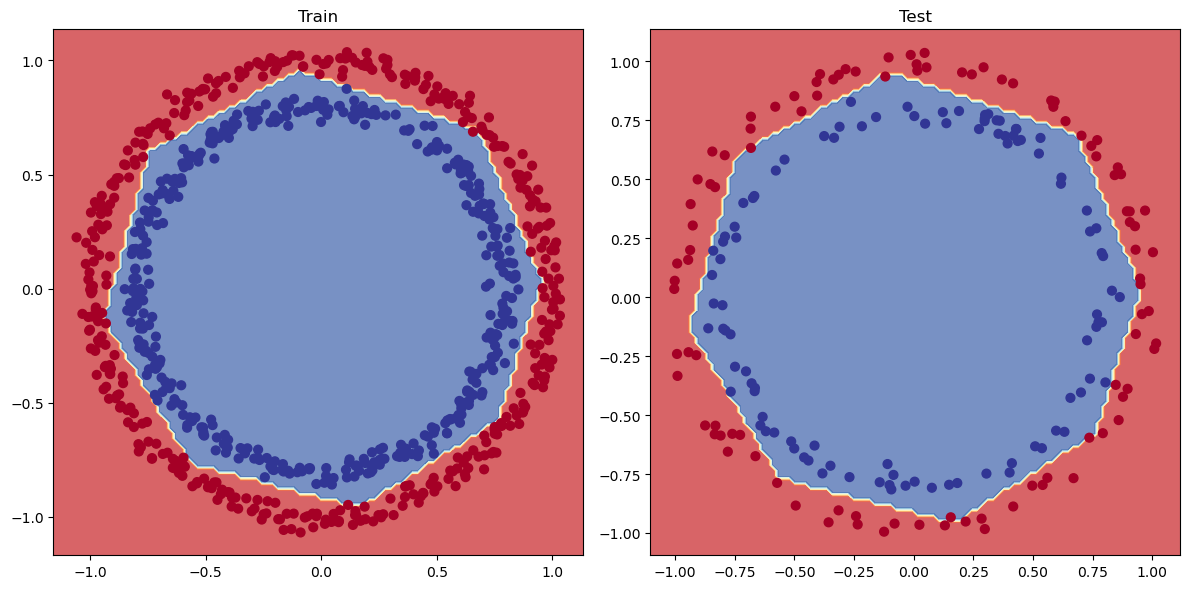

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_1, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_1, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [17]:
pd.DataFrame(hist_1.history)

loss  accuracy
0   0.695878   0.48375
1   0.692726   0.49500
2   0.690148   0.50875
3   0.688981   0.51625
4   0.684744   0.54750
5   0.677123   0.56750
6   0.668675   0.58250
7   0.657773   0.60000
8   0.642715   0.60375
9   0.619977   0.70125
10  0.581731   0.75750
11  0.533766   0.78750
12  0.488726   0.84500
13  0.444293   0.85875
14  0.388635   0.88500
15  0.302697   0.92000
16  0.228779   0.97875
17  0.181272   0.99125
18  0.157437   0.98625
19  0.128901   0.99250
20  0.119417   0.98875
21  0.101704   0.99250
22  0.087642   0.99500
23  0.080084   0.99625
24  0.077844   0.99125

Text(0.5, 1.0, 'epochs vs loss')

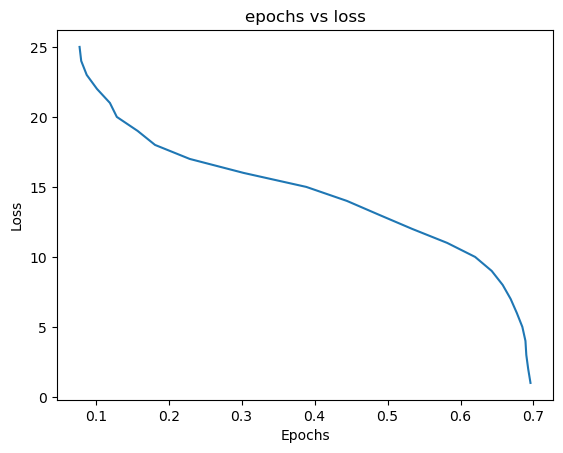

In [18]:
loss= hist_1.history["loss"]
epochs = tf.range(1, len(loss)+1)
plt.plot(loss, epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("epochs vs loss")

Text(0.5, 1.0, 'Model 1 loss curve')

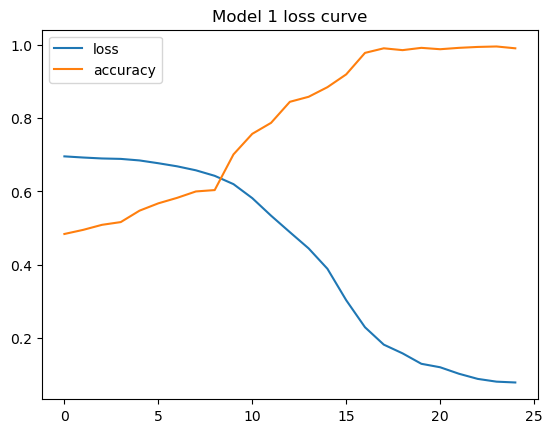

In [19]:
pd.DataFrame(hist_1.history).plot()
plt.title("Model 1 loss curve")

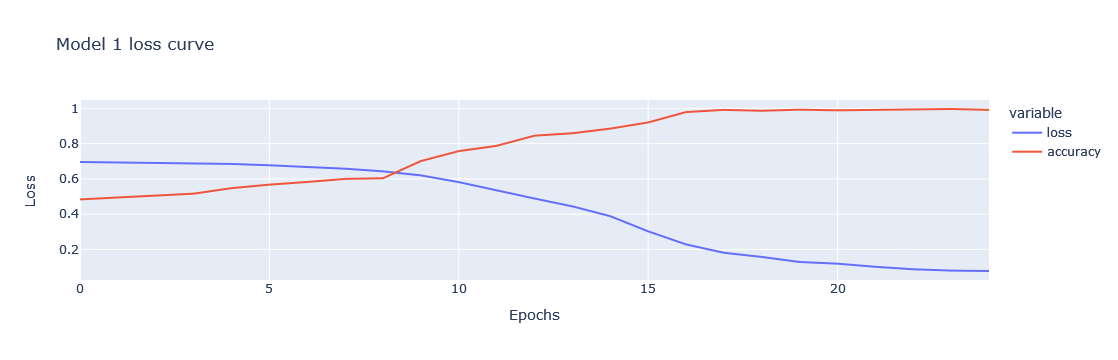

In [20]:
# Assuming hist_1.history is a dictionary with keys like 'loss', 'val_loss', etc.
history_df = pd.DataFrame(hist_1.history)

# Plotting with Plotly Express
fig = px.line(history_df, title='Model 1 loss curve')
fig.update_xaxes(title='Epochs')
fig.update_yaxes(title='Loss')

fig.show()

In [21]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])  # Metrics adjusted for regression
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*(epoch/20))

hist_2 = model_2.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

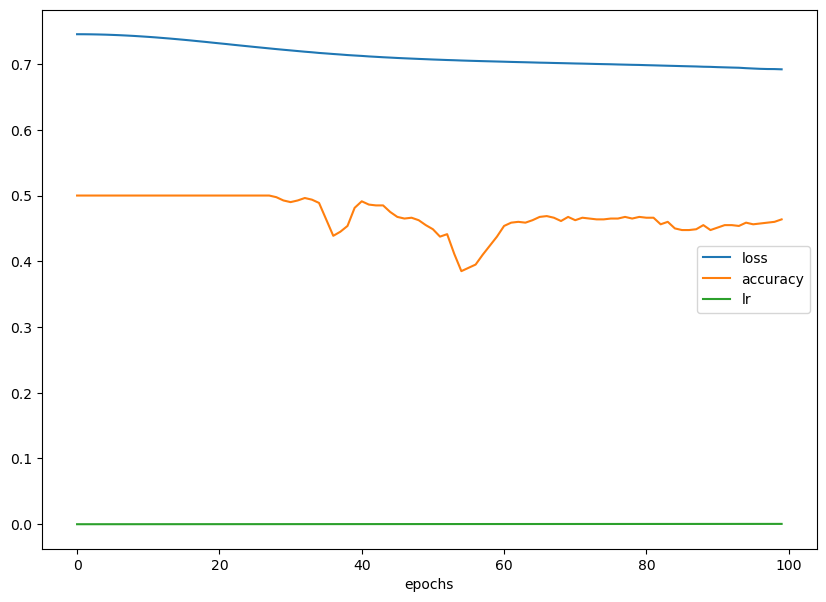

In [22]:
pd.DataFrame(hist_2.history).plot(figsize=(10, 7), xlabel="epochs");

In [23]:
lrs = 1e-04*(10**(tf.range(100)/20))

Text(0.5, 1.0, 'Learning Rate vs. Loss')

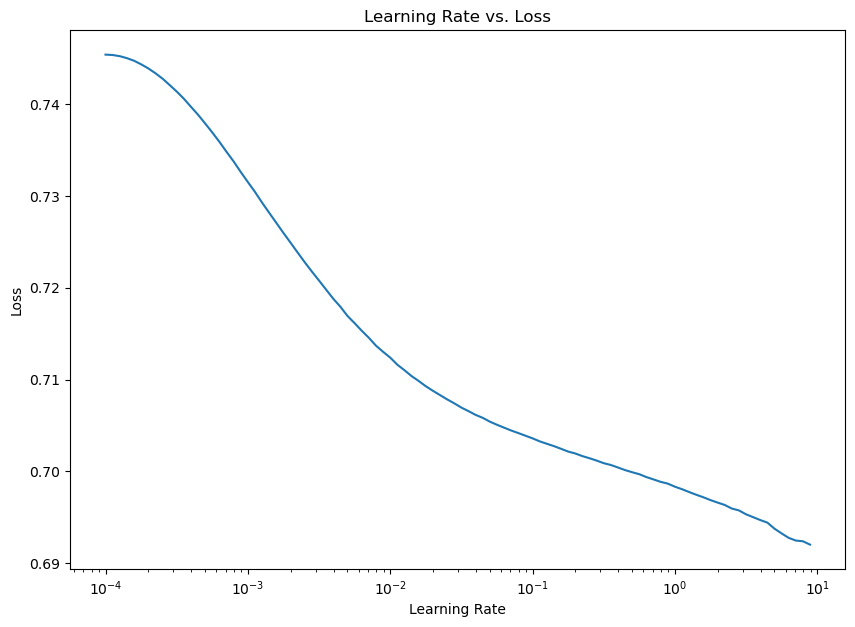

In [24]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [25]:
#Set random seed
tf.random.set_seed(42)

#Create a model
model_new = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
   tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
   tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model
model_new.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

#Create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model
hist_new = model_new.fit(x_train,
                         y_train,
                         epochs=100,
                         callbacks=[lr_scheduler],
                        verbose=0)

In [26]:
model_new.evaluate(x_test, y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.9560 - accuracy: 0.5000


[0.9560175538063049, 0.5]

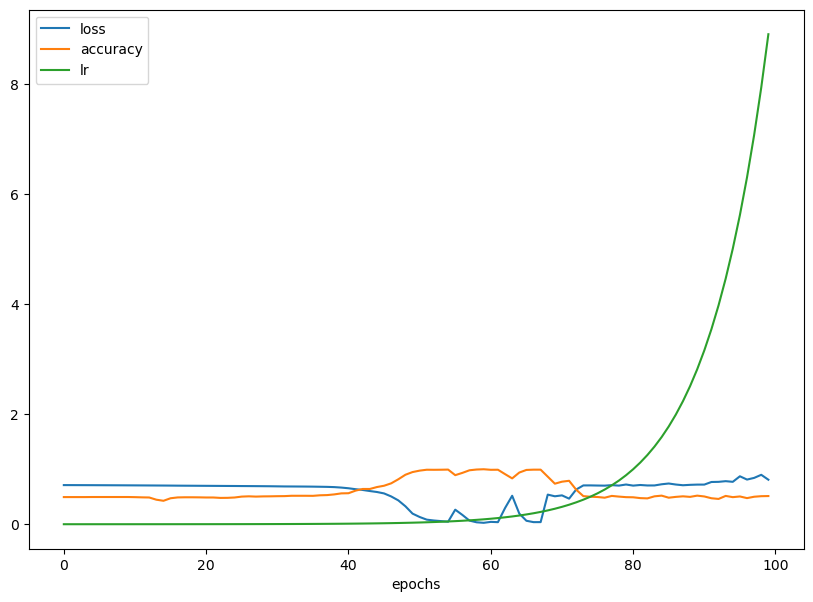

In [27]:
pd.DataFrame(hist_new.history).plot(figsize=(10, 7), xlabel="epochs");

In [28]:
#Plot the learning rate vs the loss
lrs = 1e-4*10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [29]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

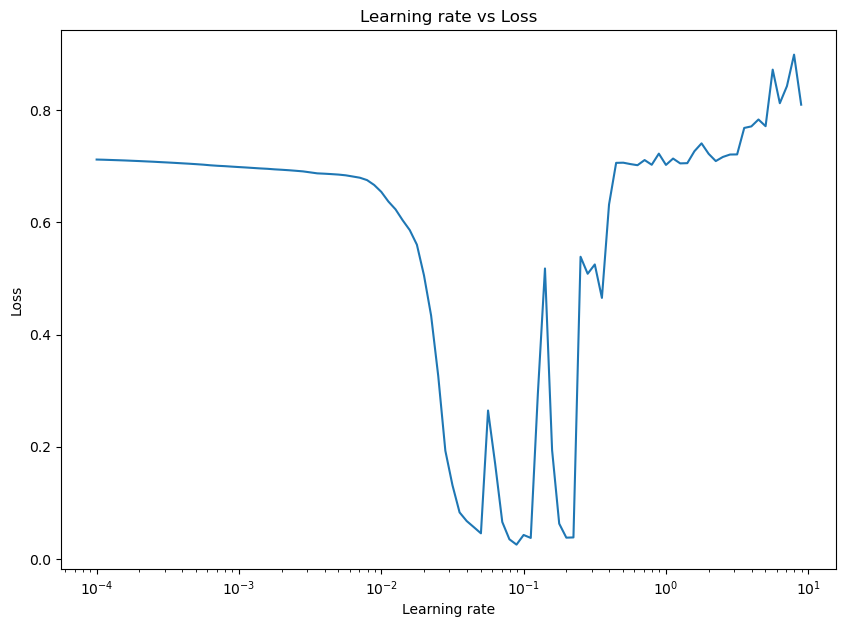

In [30]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, hist_new.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [31]:
#Set random seed
tf.random.set_seed(42)

#Create a model
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
   tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
   tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                  metrics=["accuracy"])

#Create a learning rate callback scheduler
lr_scheduler_1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model
hist_3 = model_3.fit(x_train,
                         y_train,
                         epochs=100,
                         callbacks=[lr_scheduler_1],
                        verbose=0)

In [32]:
model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9635 - accuracy: 0.5000


[0.9635059237480164, 0.5]

Text(0.5, 1.0, 'Learning rate vs Loss')

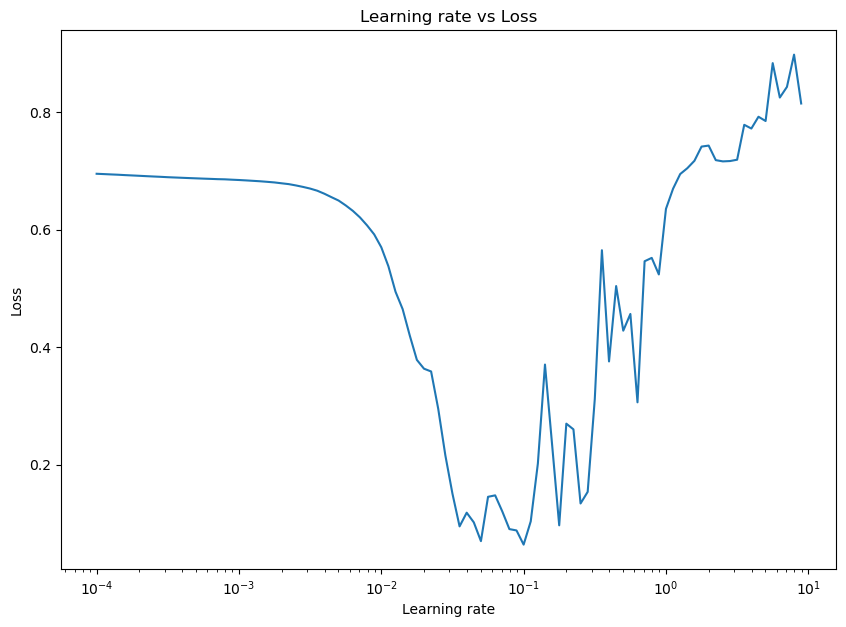

In [33]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, hist_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

313/313 [==============================] - 1s 3ms/step
We are doing binary classification
313/313 [==============================] - 1s 2ms/step
We are doing binary classification


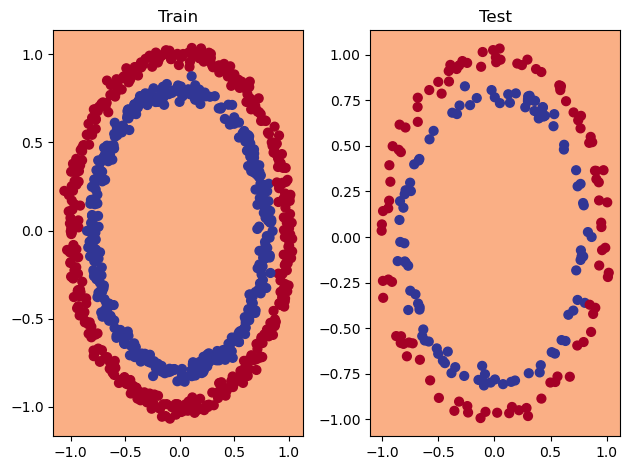

In [34]:
# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_new, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_new, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [35]:
#Model 4

#random set
tf.random.set_seed(42)

#Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model_4
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#Fit the model (passing lr_scheduler callback)
hist_4 = model_4.fit(x_train,
                     y_train,
                     epochs=100,
                     callbacks=[lr_scheduler_1],
                     verbose=0)                             

<Axes: xlabel='epochs'>

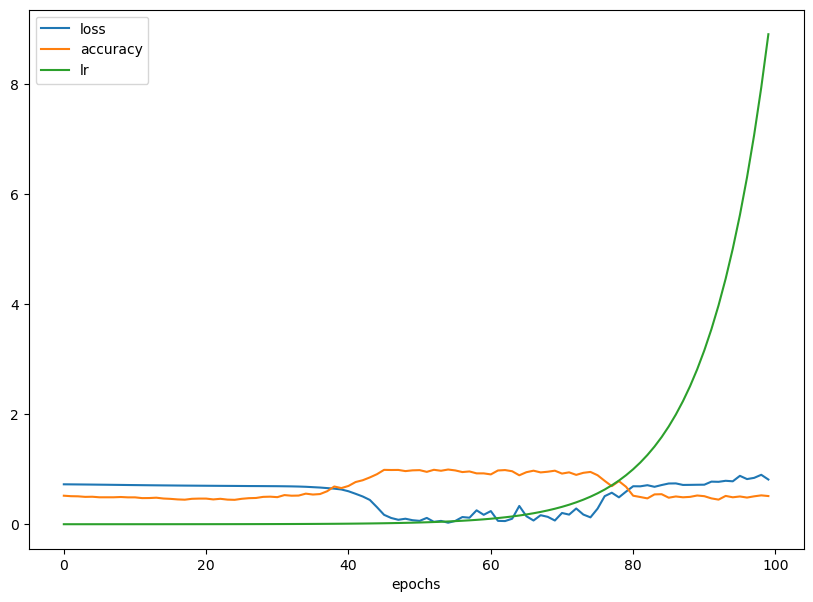

In [36]:
#Checkout the history
pd.DataFrame(hist_4.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

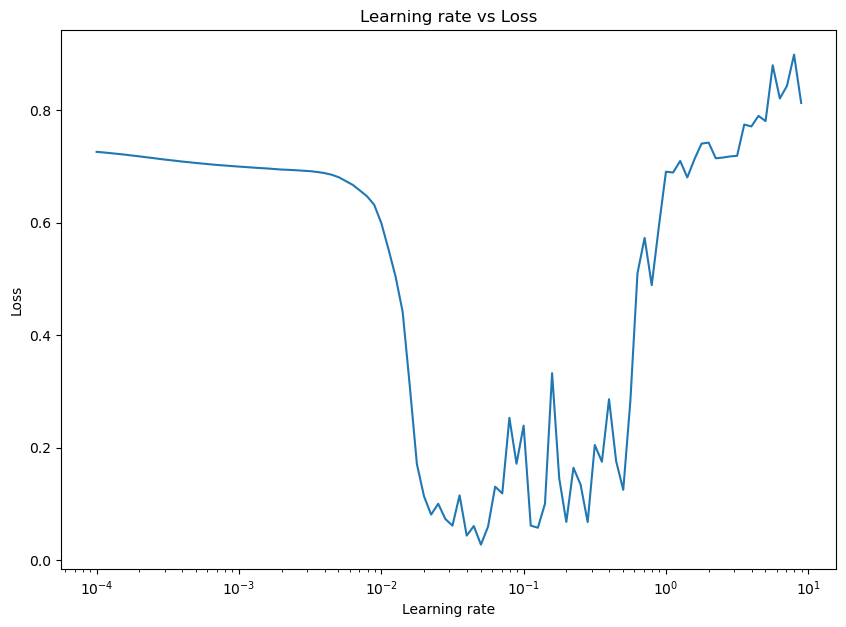

In [37]:
#Plot the learning rate vs the loss
lrs = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, hist_4.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [38]:
#Model 5

#random set
tf.random.set_seed(42)

#Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model_4
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.05),
                metrics=["accuracy"])


#Fit the model (passing lr_scheduler callback)
hist_5 = model_5.fit(x_train,
                     y_train,
                     epochs=25,
                     verbose=0)                             

313/313 [==============================] - 1s 2ms/step
We are doing binary classification
313/313 [==============================] - 1s 2ms/step
We are doing binary classification


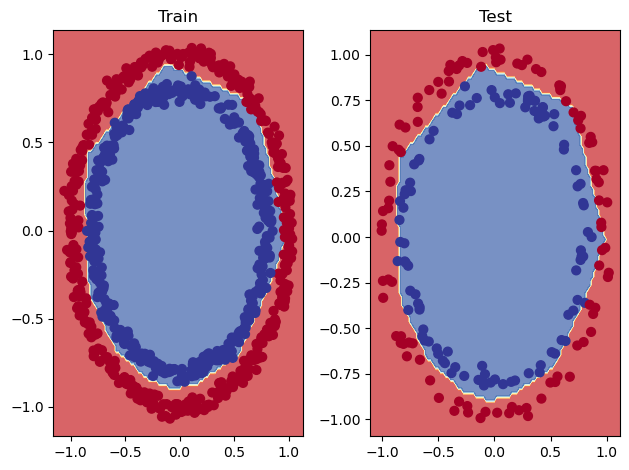

In [39]:
# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_5, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_5, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [40]:
model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.9612 - accuracy: 0.5000


[0.961151659488678, 0.5]

In [41]:
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0688 - accuracy: 0.9750


[0.06880729645490646, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
We are doing binary classification
313/313 [==============================] - 1s 2ms/step
We are doing binary classification


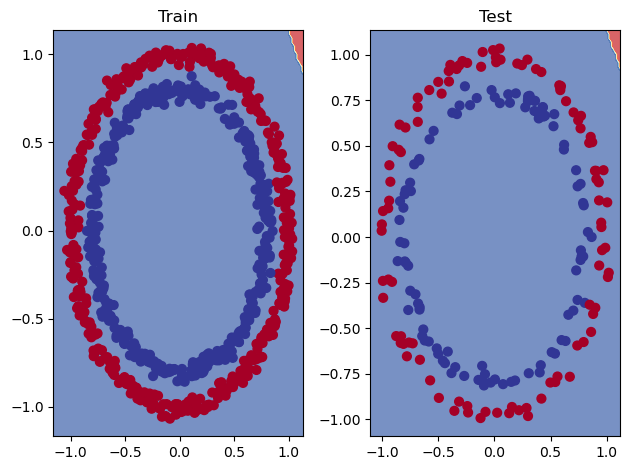

In [42]:
# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_4, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_4, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [ ]:
#The other evaluation metrics that we need to know:
# Accuracy
# Precision
# Recall
# F1-Score
# Confusion_metrics

In [46]:
#Check the accuracy of our model:
loss, accuracy = model_5.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss:.3f}")
print(f"Model accuracy on the test set: {(accuracy*100):.3f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9750
Model loss on the test set: 0.069
Model accuracy on the test set: 97.500%


In [48]:
#Model 6 with precision

#random set
tf.random.set_seed(42)

#Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model_4
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.05),
                metrics=["Precision"])


#Fit the model (passing lr_scheduler callback)
hist_6 = model_6.fit(x_train,
                     y_train,
                     epochs=25,
                     verbose=0)                            

In [49]:
loss, precision = model_6.evaluate(x_test, y_test)
print(f"Model loss on the test data set: {loss:.2f}")
print(f"Model precision on the test set: {(precision*100):.2f}")

7/7 [==============================] - 1s 4ms/step - loss: 0.0923 - precision: 0.9340
Model loss on the test data set: 0.09
Model precision on the test set: 93.40


313/313 [==============================] - 1s 2ms/step
We are doing binary classification
313/313 [==============================] - 1s 3ms/step
We are doing binary classification


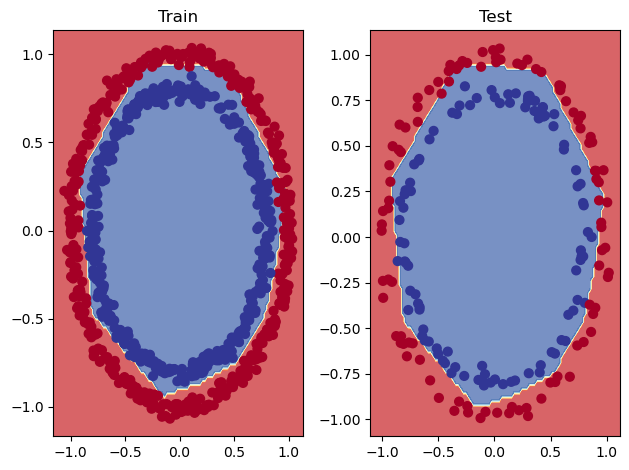

In [50]:
# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_6, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_6, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [51]:
#Model 7 with Recall

#random set
tf.random.set_seed(42)

#Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model_4
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.05),
                metrics=["Recall"])


#Fit the model (passing lr_scheduler callback)
hist_7 = model_7.fit(x_train,
                     y_train,
                     epochs=25,
                     verbose=0)   

In [65]:
loss, recall = model_7.evaluate(x_test, y_test)
print(f"Model loss on the test data set: {loss:.2f}")
print(f"Model recall on the test set: {(recall*100):.2f}")

7/7 [==============================] - 0s 4ms/step - loss: 0.2593 - recall: 0.8600
Model loss on the test data set: 0.26
Model recall on the test set: 86.00


313/313 [==============================] - 1s 3ms/step
We are doing binary classification
313/313 [==============================] - 1s 3ms/step
We are doing binary classification


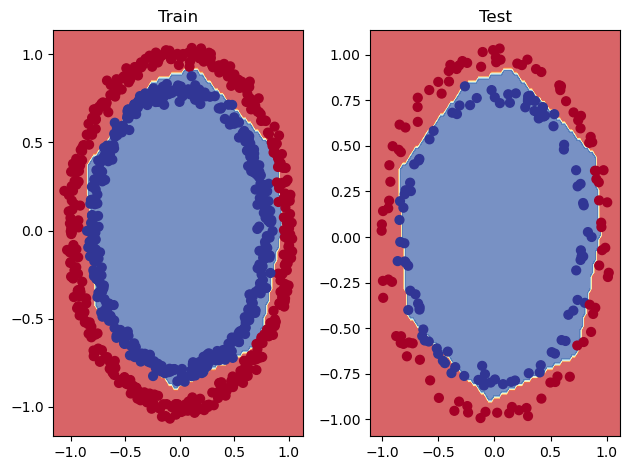

In [53]:
# Plot for Training Data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_7, x=x_train, y=y_train)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_7, x=x_test, y=y_test)

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()

In [64]:
# How about the confusion matrix?
from sklearn.metrics import confusion_matrix

#Make  predictions
y_preds = model_7.predict(x_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[97,  3],
       [14, 86]], dtype=int64)

In [62]:
y_test[:3], y_preds[:3]

(array([1, 0, 1], dtype=int64),
 array([[0.9839827 ],
        [0.13732189],
        [0.9999111 ]], dtype=float32))

In [63]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

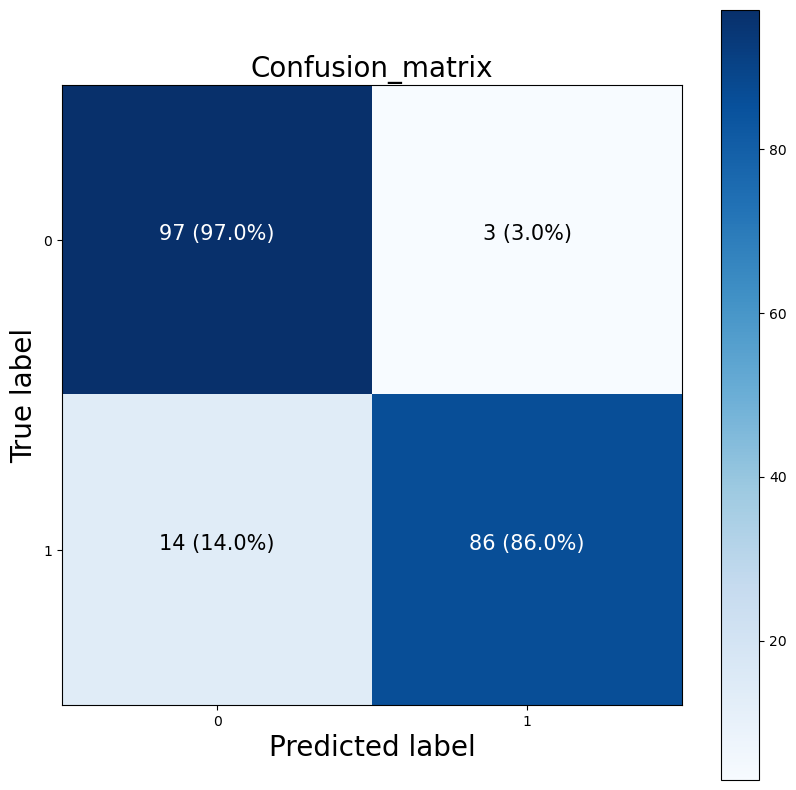

In [73]:
#Note the confusion matrxi is the remix of scikit-learn's plot_confusion_matrix
import itertools
fz = (10, 10)
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]

n_classes = cm.shape[0]

#Let us prettify it
fig, ax = plt.subplots(figsize=fz)
#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labeles = classes
else:
    labels = np.arange(n_classes)

#Label axes
ax.set(title="Confusion_matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis label buttom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colours
threshold = (cm.max() + cm.min())/ 2.

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size = 15)

In [74]:
# function for confusion matrix
def plot_confusion_matrix(true_label, preds_label):
 import itertools
 fz = (10, 10)
 cm = confusion_matrix(true_label, tf.round(preds_label))
 cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]

 n_classes = cm.shape[0]

 #Let us prettify it
 fig, ax = plt.subplots(figsize=fz)
 #Create a matrix plot
 cax = ax.matshow(cm, cmap=plt.cm.Blues)
 fig.colorbar(cax)

 #Create classes
 classes = False

 if classes:
     labels = classes
 else:
    labels = np.arange(n_classes)

 #Label axes
 ax.set(title="Confusion_matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

 #Set x-axis label buttom
 ax.xaxis.set_label_position("bottom")
 ax.xaxis.tick_bottom()

 #Adjust label size
 ax.yaxis.label.set_size(20)
 ax.xaxis.label.set_size(20)
 ax.title.set_size(20)

 #Set threshold for different colours
 threshold = (cm.max() + cm.min())/ 2.

 #Plot the text on each cell
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
     horizontalalignment="center",
     color="white" if cm[i, j] > threshold else "black",
     size = 15)   

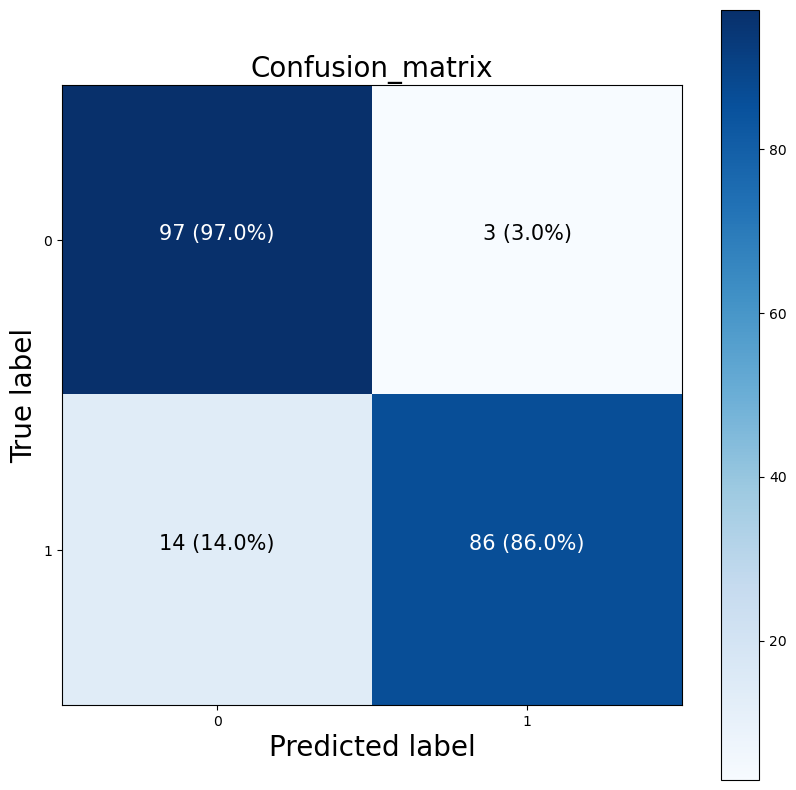

In [75]:
plot_confusion_matrix(y_test, y_preds)

2